In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Read the data and assign values for `season`, `weathersit`, `month` & `weekday` columns

In [158]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [160]:
#assigning values for the season column
bike_sharing['season'] = bike_sharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#assigning values for the weathersit column
bike_sharing['weathersit'] = bike_sharing['weathersit'].map({1:'cloudy', 2:'mist', 3:'light_rain', 4:'heavy_rain'})

#assigning values for the mnth column
bike_sharing['mnth'] = bike_sharing['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

#assigning values for the weekday column
bike_sharing['weekday'] = bike_sharing['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 1: Understanding the data

In [163]:
bike_sharing.shape

(730, 16)

In [165]:
#Checking if the dataset has any missing values
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [167]:
bike_sharing.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


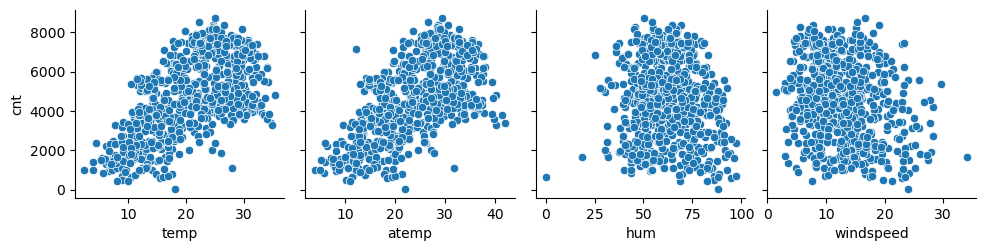

In [168]:
#Checking if the target variable 'cnt' has a linear relationship with the numeric variables
sns.pairplot(bike_sharing, x_vars = ['temp','atemp','hum','windspeed'], y_vars = ['cnt'])

It can be seen that the variables temp & atemp have a linear relationship with the target variable 'cnt'

<Axes: xlabel='weathersit', ylabel='cnt'>

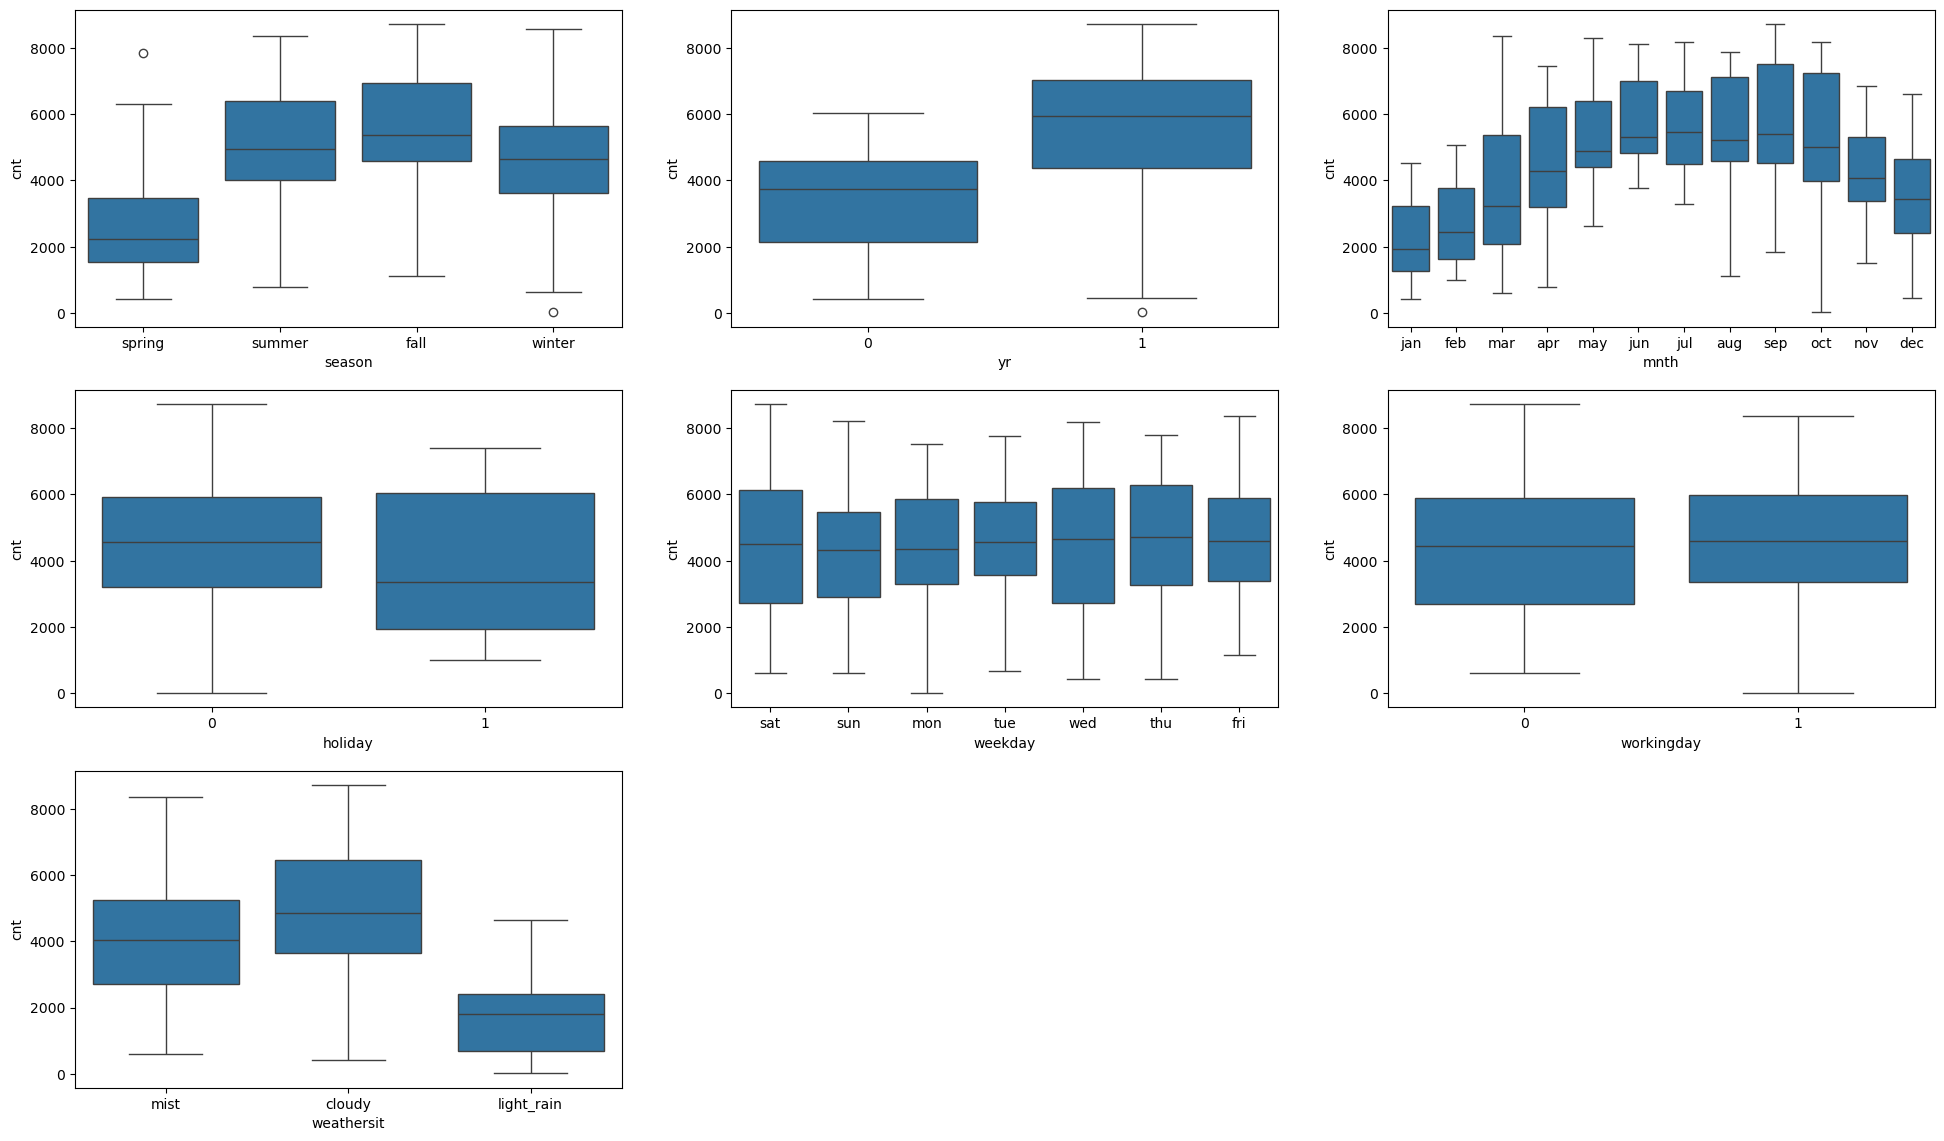

In [172]:
#Visualizing the categorical variables

plt.figure(figsize=(24,14))

plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike_sharing)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bike_sharing)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike_sharing)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing)

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing)

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing)

- We can see that the target variable count has high values for the seasons `summer` & `fall` (the same can be seen in months as well)
- Also, the bike booking has increased in the year 2019 (as said in the problem description)
- The target variable has high values for `non-holidays` as well
- The target variable has high values for weathersit - `cloudy` & `mist`
- The columns `instant`,`dteday` do not interpret or influence the target variable (Since `instant` column represents the index of the row; `yr`,`mnth`,`weekday` columns are captured separately, `dteday` can be dropped). Also, the target variable `cnt` is the sum of the columns `casual` & `registered`. So `casual` & `registered` columns can be dropped as well

## Step 2: Preparing the data for modeling
- Dropping unwanted columns
- Encoding
    - There are no binary categorical variables in this dataset (Yes/No values)
    - Conversion of other categorical variables to dummy variables is done below
- Train Test Split
- Rescaling of variables

### Dropping unwanted columns

The columns `instant`,`dteday` do not interpret or influence the target variable (Since `instant` column represents the index of the row; `yr`,`mnth`,`weekday` columns are captured separately, `dteday` can be dropped). Also, the target variable `cnt` is the sum of the columns `casual` & `registered`. So `casual` & `registered` columns can be dropped as well

In [177]:
bike_sharing = bike_sharing.drop(['instant','dteday','casual','registered'], axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [179]:
bike_sharing.shape

(730, 12)

### Conversion of categorical variables to dummy variables

The following variables are converted to dummy variables - `season`, `weathersit`, `mnth`, `weekday`

In [182]:
status = pd.get_dummies(bike_sharing['season'], dtype=int, drop_first='True')
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [184]:
bike_sharing = pd.concat([bike_sharing, status], axis=1)
bike_sharing = bike_sharing.drop('season', axis=1)
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,mon,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tue,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wed,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [186]:
status = pd.get_dummies(bike_sharing['weathersit'], dtype=int, drop_first='True')
status.head()

,light_rain,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [188]:
bike_sharing = pd.concat([bike_sharing, status], axis=1)
bike_sharing = bike_sharing.drop('weathersit', axis=1)
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,mist
0,0,jan,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,jan,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,jan,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,jan,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [190]:
status = pd.get_dummies(bike_sharing['mnth'], dtype=int, drop_first='True')
status.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [192]:
bike_sharing = pd.concat([bike_sharing, status], axis=1)
bike_sharing = bike_sharing.drop('mnth', axis=1)
bike_sharing.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [194]:
status = pd.get_dummies(bike_sharing['weekday'], dtype=int, drop_first='True')
status.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [196]:
bike_sharing = pd.concat([bike_sharing, status], axis=1)
bike_sharing = bike_sharing.drop('weekday', axis=1)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


### Dummy Variable denotion shown below for `season` & `weathersit` columns

#### Seasons
- 000 - fall
- 100 - spring
- 010 - summer
- 001 - winter

#### Weathersit
- 000 - cloudy
- 100 - light_rain
- 010 - mist
- 001 - heavy_rain

### Train Test split

In [337]:
df_train, df_test = train_test_split(bike_sharing, train_size=0.8, random_state=100)
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


### Rescaling of numeric variables

In [339]:
#instantiate an object
scaler = MinMaxScaler()

#create a list of numeric variables
numeric_vars = ['temp','atemp','hum','windspeed','cnt']

#fit_transform on the training data
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,...,0,0,0,0,0,0,0,0,1,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,0,0,1,0,0,0,0,1,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,...,0,0,0,0,1,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,0,0,0,0,0,0,0,0,0,0
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,...,0,0,0,0,0,0,1,0,0,0


## Step 3: Training the Model

#### Dividing into x & y sets for model building

In [341]:
y_train = df_train.pop('cnt')
X_train = df_train

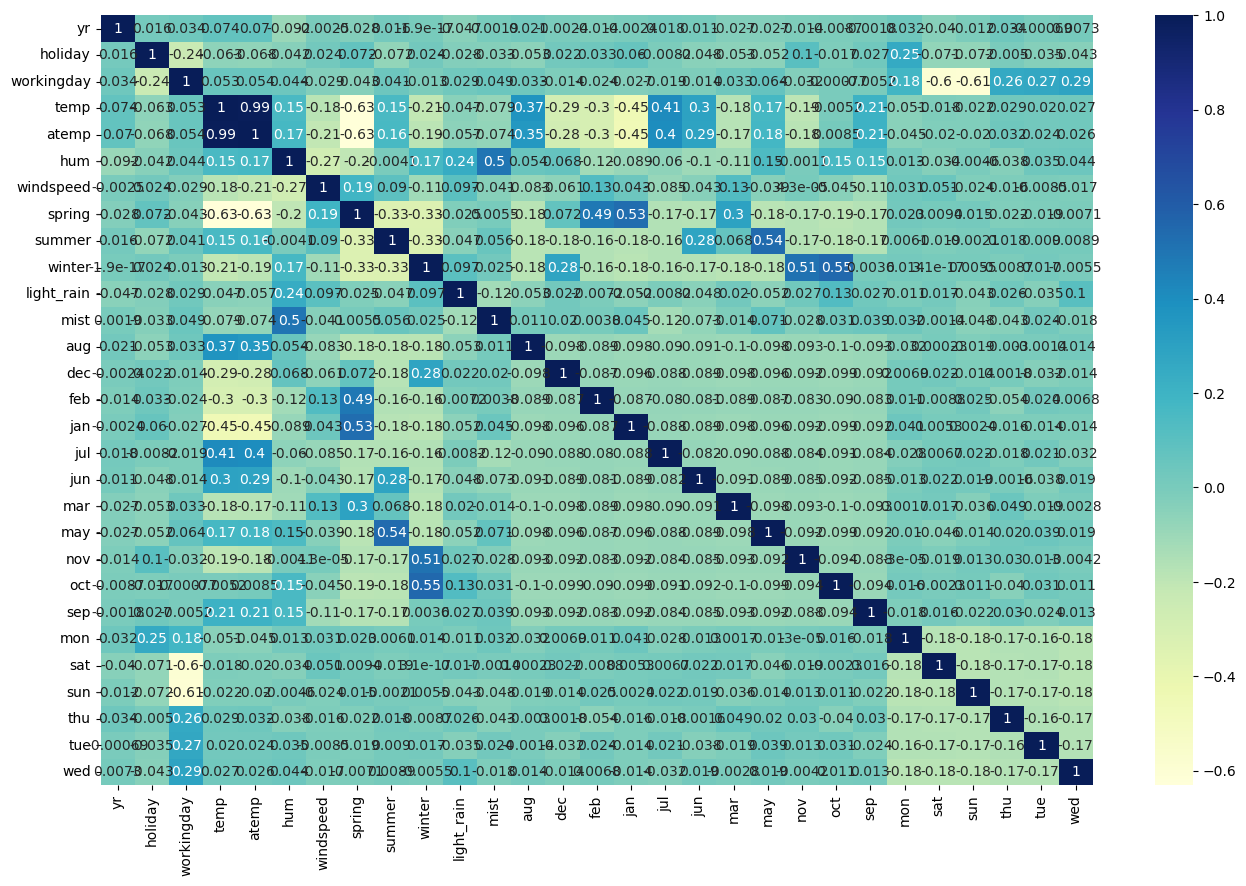

In [210]:
#checking the correlation between different variables using a heatmap

plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### We will use the linear regression function from SciKit Learn

In [212]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [215]:
# running RFE with the no. of ouput variables = 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [217]:
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [219]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light_rain', True, 1),
 ('mist', True, 1),
 ('aug', False, 5),
 ('dec', False, 12),
 ('feb', False, 10),
 ('jan', False, 3),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 6),
 ('may', False, 7),
 ('nov', False, 11),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 15),
 ('tue', False, 9),
 ('wed', False, 13)]

In [221]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'light_rain', 'mist', 'jul', 'sep', 'sat', 'sun'],
      dtype='object')

In [223]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

#### Bulding model using statsmodel api for detailed statistics

#### 1st Model

In [259]:
#Creating X_train_rfe with RFE selected variables
#removing jul variable since it is correlated with summer

X_train_new1 = X_train[col].drop(['jul'], axis=1)

In [261]:
#Adding a constant variable
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_new1)

In [263]:
#running the linear model
lm = sm.OLS(y_train, X_train_lm1).fit()

In [265]:
#summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          3.17e-224
Time:                        03:07:11   Log-Likelihood:                 594.56
No. Observations:                 584   AIC:                            -1161.
Df Residuals:                     570   BIC:                            -1100.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1833      0.026      7.045      0.0

In [271]:
#calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = ['VIF'], ascending=False)
vif

,Features,VIF
2,workingday,51.75
13,sun,12.71
12,sat,12.23
6,spring,4.91
3,temp,3.47
8,winter,3.16
1,holiday,3.10
7,summer,2.23
4,hum,1.93
10,mist,1.59


#### 2nd Model

- We can see that both the r2 and adjusted r2 are around 0.85 (which is good)
- The p-value of the coefficients are lower than 0.05, so the features are significant (except for `holiday`). `holiday` has a p-value of 0.150, so its coefficient is not significant
- Rebuilding the model without `holiday` feature

In [277]:
#dropping holiday column
X_train_new2 = X_train_lm1.drop(['const','holiday'], axis=1)

#adding the constant
X_train_lm2 = sm.add_constant(X_train_new2)

#running the linear model
lm = sm.OLS(y_train, X_train_lm2).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          3.17e-224
Time:                        03:09:35   Log-Likelihood:                 594.56
No. Observations:                 584   AIC:                            -1161.
Df Residuals:                     570   BIC:                            -1100.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1558      0.039      4.003      0.0

- We can see that both the r2 and adjusted r2 are around 0.85
- Also, all the variables are significant

In [279]:
#calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = ['VIF'], ascending=False)
vif

,Features,VIF
3,hum,32.20
1,workingday,17.64
2,temp,17.59
4,windspeed,4.88
12,sun,4.83
5,spring,4.71
11,sat,4.67
7,winter,3.40
6,summer,2.61
9,mist,2.32


#### 3rd Model

The VIF value for `hum` is too high. Rebuilding the model without the `hum` variable

In [281]:
#dropping hum column
X_train_new3 = X_train_lm2.drop(['const','hum'], axis=1)

#adding the constant
X_train_lm3 = sm.add_constant(X_train_new3)

#running the linear model
lm = sm.OLS(y_train, X_train_lm3).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     257.9
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.05e-221
Time:                        03:10:27   Log-Likelihood:                 585.03
No. Observations:                 584   AIC:                            -1144.
Df Residuals:                     571   BIC:                            -1087.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0772      0.035      2.206      0.0

In [283]:
#calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = ['VIF'], ascending=False)
vif

,Features,VIF
1,workingday,15.39
2,temp,11.59
3,windspeed,4.76
11,sun,4.23
10,sat,4.19
4,spring,3.71
6,winter,2.55
5,summer,2.37
0,yr,2.08
8,mist,1.57


#### 4th Model

The VIF value for `workingday` is too high. Rebuilding the model without the `workingday` variable

In [285]:
#dropping workingday column
X_train_new4 = X_train_lm3.drop(['const','workingday'], axis=1)

#adding the constant
X_train_lm4 = sm.add_constant(X_train_new4)

#running the linear model
lm = sm.OLS(y_train, X_train_lm4).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     268.7
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          1.09e-217
Time:                        03:10:46   Log-Likelihood:                 573.33
No. Observations:                 584   AIC:                            -1123.
Df Residuals:                     572   BIC:                            -1070.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1846      0.028      6.689      0.0

In [287]:
#calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = ['VIF'], ascending=False)
vif

,Features,VIF
2,windspeed,4.62
1,temp,4.05
0,yr,2.08
3,spring,2.08
4,summer,1.93
5,winter,1.65
7,mist,1.55
8,sep,1.22
10,sun,1.22
9,sat,1.21


#### 5th Model

The p-value of `sat` is too high, so the coefficient of the `sat` variable is insignificant. Rebuilding the model without the `sat` variable

In [297]:
#dropping sat column
X_train_new5 = X_train_lm4.drop(['const','sat'], axis=1)

#adding the constant
X_train_lm5 = sm.add_constant(X_train_new5)

#running the linear model
lm = sm.OLS(y_train, X_train_lm5).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     294.9
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          1.61e-218
Time:                        03:14:41   Log-Likelihood:                 572.35
No. Observations:                 584   AIC:                            -1123.
Df Residuals:                     573   BIC:                            -1075.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1879      0.028      6.829      0.0

In [299]:
#calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = ['VIF'], ascending=False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.98
0,yr,2.07
3,spring,2.06
4,summer,1.92
5,winter,1.64
7,mist,1.55
8,sep,1.22
9,sun,1.18
6,light_rain,1.07


### 6th model

The VIF value for `windspeed` is 5 when rounded. Rebuilding the model without the `windspeed` variable

In [326]:
#dropping sat column
X_train_new6 = X_train_lm5.drop(['const','windspeed'], axis=1)

#adding the constant
X_train_lm6 = sm.add_constant(X_train_new6)

#running the linear model
lm = sm.OLS(y_train, X_train_lm6).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     302.6
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.16e-211
Time:                        03:19:13   Log-Likelihood:                 552.63
No. Observations:                 584   AIC:                            -1085.
Df Residuals:                     574   BIC:                            -1042.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1359      0.027      5.007      0.0

In [328]:
#calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = ['VIF'], ascending=False)
vif

,Features,VIF
1,temp,2.97
0,yr,2.07
3,summer,1.69
6,mist,1.55
4,winter,1.46
2,spring,1.36
7,sep,1.22
8,sun,1.18
5,light_rain,1.06


- ### All the p-values of the coefficients are almost equal to 0. So the coefficients of all the features are significant
- ### Both r2 and adjusted r2 are almost equal to 0.82
- ### The VIF value of all the variables are less than 5
- ### Finalising this model due to the reasons stated above

## Step 4: Residual Analysis of the training data

In [331]:
y_train_pred = lm.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

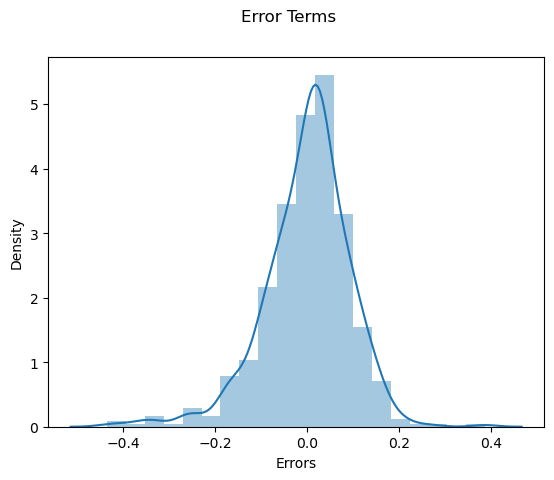

In [333]:
fig = plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')

## Step 5: Making predictions

### Feature scaling of numeric variables of the test data

In [343]:
#list of numeric variables
numeric_vars = ['temp','atemp','hum','windspeed','cnt']

#fit_transform on the training data
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [345]:
y_test = df_test.pop('cnt')
X_test = df_test

In [347]:
X_test_new = X_test[X_train_new6.columns]

In [349]:
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lm.predict(X_test_new)

## Step 6: Model Evaluation

#### Evaluating the model by finding the r2 for test data prediction

In [351]:
r2_score(y_test,y_test_pred)

0.7772220052179412

In [353]:
r2_score(y_train,y_train_pred)

0.8259470374886566

### The r2 for test data prediction is 0.78. Also, note from the above cells that the r2 when the model was built was around 0.82. The difference between these r2 values is negligible. Hence our model explains the variance of the target variable in a great manner for both the test & train data

In [85]:
# plotting y_test & y_test_pred to understand the spread

Text(0, 0.5, 'y_pred')

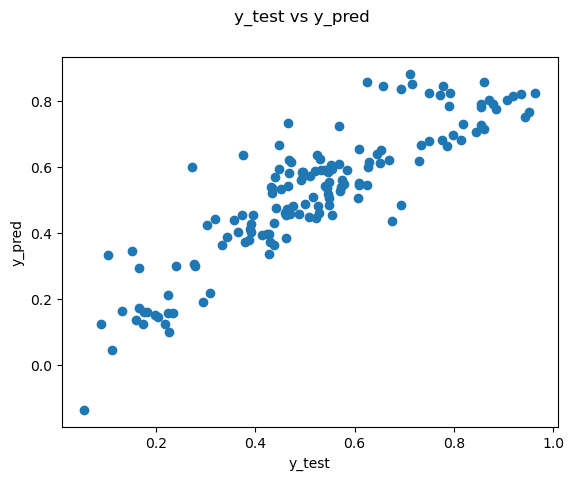

In [357]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

## `lm` is the model which is finally built using RFE + manual elimination method based on r2, p-value of the coefficients and VIF

In [360]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     302.6
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.16e-211
Time:                        03:24:06   Log-Likelihood:                 552.63
No. Observations:                 584   AIC:                            -1085.
Df Residuals:                     574   BIC:                            -1042.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1359      0.027      5.007      0.0

## The dataframe `X_train_new6` has the final list of columns which are considered for building the model

In [363]:
X_train_new6.columns

Index(['yr', 'temp', 'spring', 'summer', 'winter', 'light_rain', 'mist', 'sep',
       'sun'],
      dtype='object')

## Conclusion

Following are the significant variables to predict the demand for bike sharing
- yr
- temp
- season (1-spring, 2-summer, 4-winter)
- weathersit (3-light_rain, 2-mist)
- mnth(9-sep)
- weekday(0-sun)